In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
!mkdir -p scow_data
!cd scow_data; curl -O http://cioss.coas.oregonstate.edu/scow/data/monthly_fields/wind_stress_zonal_monthly_maps.nc
!cd scow_data; curl -O http://cioss.coas.oregonstate.edu/scow/data/monthly_fields/wind_stress_meridional_monthly_maps.nc  
!cd scow_data; curl -O http://cioss.coas.oregonstate.edu/scow/data/monthly_fields/wind_curl_monthly_maps.nc  


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 36.9M  100 36.9M    0     0  7585k      0  0:00:04  0:00:04 --:--:-- 8481k  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 36.9M  100 36.9M    0     0  8380k      0  0:00:04  0:00:04 --:--:-- 8719k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 36.9M  100 36.9M    0     0  8381k      0  0:00:04  0:00:04 --:--:-- 8381k


In [22]:
ds = xr.open_dataset('scow_data/wind_curl_monthly_maps.nc')
ds.info()

xarray.Dataset {
dimensions:
	latitude = 560 ;
	longitude = 1440 ;

variables:
	float32 latitude(latitude) ;
		latitude:units = degrees_north ;
	float32 longitude(longitude) ;
		longitude:units = degrees_east ;
	float32 january(latitude, longitude) ;
		january:long_name = January Wind Curl ;
		january:fillValue_ = -9999.0 ;
		january:units = m/s per 100 km ;
	float32 february(latitude, longitude) ;
		february:long_name = February Wind Curl ;
		february:fillValue_ = -9999.0 ;
		february:units = m/s per 100 km ;
	float32 march(latitude, longitude) ;
		march:long_name = March Wind Curl ;
		march:fillValue_ = -9999.0 ;
		march:units = m/s per 100 km ;
	float32 april(latitude, longitude) ;
		april:long_name = April Wind Curl ;
		april:fillValue_ = -9999.0 ;
		april:units = m/s per 100 km ;
	float32 may(latitude, longitude) ;
		may:long_name = May Wind Curl ;
		may:fillValue_ = -9999.0 ;
		may:units = m/s per 100 km ;
	float32 june(latitude, longitude) ;
		june:long_name = June Wind Curl ;
	

In [27]:
# create a time dimension
month = xr.DataArray([vname for vname in ds.data_vars], dims='month').rename('month')
month
dsets = [ds[m] for m in month.values]
dsm = xr.concat(dsets, dim=month).to_dataset(name='wind_curl')
dsm = dsm.where(dsm.wind_curl>-9999.0)
# units are m/s per 100 km
dsm

<xarray.Dataset>
Dimensions:    (latitude: 560, longitude: 1440, month: 12)
Coordinates:
  * latitude   (latitude) float32 -69.875 -69.625 -69.375 -69.125 -68.875 ...
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 1.125 1.375 1.625 ...
  * month      (month) <U9 u'january' u'february' u'march' u'april' u'may' ...
Data variables:
    wind_curl  (month, latitude, longitude) float32 nan nan nan nan nan nan ...

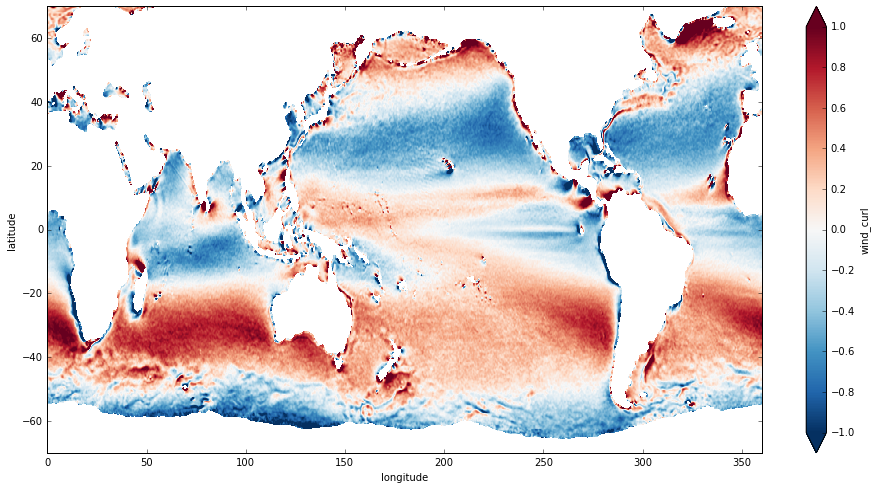

In [26]:
plt.figure(figsize=(16,8))
dsm.wind_curl.mean(dim='month').plot(vmin=-1)
